In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pymc as pm
import scipy.stats as sps

sns.set()

print ('!!!!! RUN new_york_data to update the info before running this one !!!!!')

!!!!! RUN new_york_data to update the info before running this one !!!!!


In [2]:
dick = pd.read_pickle('us_state_dict.pkl')


In [3]:
df = pd.DataFrame()

def get_latest_numbers(df,statename):
    state = dick[statename]
    last_row = pd.DataFrame(state.iloc[-1]).T
    last_row['state'] = statename
    df = pd.concat([df,last_row],axis=0)
    return df

    

In [4]:
for key,data in dick.items():
    df = get_latest_numbers(df,key)
    
df.sort_values('dead_per_M',inplace=True,ascending=False)
df.head(40)
df.to_pickle('US_states_latest_day.pkl')

In [5]:
df.describe()

,confirmed,deceased,recovered,inc,dead_inc,factor,dead_factor,density,population,growth,gdp,conf_per_M,dead_per_M
count,51.000000,51.000000,51.0,51.000000,51.000000,51.000000,50.000000,51.000000,5.100000e+01,51.000000,51.000000,51.000000,51.000000
mean,11360.176471,460.313725,0.0,496.078431,29.568627,1.048743,1.053574,1117.736584,6.496451e+06,0.010941,64468.529412,1379.982603,49.691921
std,28626.365589,1439.505339,0.0,1042.613521,96.107909,0.033452,0.078302,4266.295547,7.450657e+06,0.013758,23600.489132,1783.922184,85.263355
min,275.000000,1.000000,0.0,0.000000,-5.000000,1.000000,0.722222,3.331502,5.670250e+05,-0.018500,40012.000000,284.352491,1.763591
25%,1400.000000,27.500000,0.0,36.000000,0.500000,1.026047,1.003458,131.065960,1.802113e+06,0.001650,53364.000000,484.670311,12.300858
50%,2990.000000,99.000000,0.0,130.000000,5.000000,1.047993,1.054280,279.847438,4.499692e+06,0.007500,60045.000000,719.962585,20.168597
75%,9785.500000,328.000000,0.0,452.000000,21.500000,1.058461,1.082860,580.113566,7.587794e+06,0.022500,68820.500000,1339.838310,45.261174
max,195749.000000,10058.000000,0.0,6716.000000,673.000000,1.189041,1.333333,30599.520715,3.993749e+07,0.041000,209260.000000,10069.150081,517.374349


In [6]:
df['mortality'] = df['deceased'] / df['confirmed']
df.head(40)

,confirmed,deceased,recovered,inc,dead_inc,factor,dead_factor,density,population,growth,gdp,conf_per_M,dead_per_M,state,mortality
2020-04-13,195749.0,10058.0,0.0,6716.0,673.0,1.035528,1.071710,1068.424744,19440469.0,-0.0052,89076.0,10069.150081,517.374349,New York,0.051382
2020-04-13,64584.0,2443.0,0.0,2734.0,93.0,1.044204,1.039574,3147.351220,8936574.0,0.0031,72850.0,7226.930589,273.370981,New Jersey,0.037827
2020-04-13,21016.0,884.0,0.0,421.0,44.0,1.020442,1.052381,278.469047,4645184.0,-0.0032,56836.0,4524.255659,190.304625,Louisiana,0.042063
2020-04-13,13381.0,602.0,0.0,1346.0,48.0,1.111840,1.086643,1905.891702,3563077.0,-0.0027,80489.0,3755.461922,168.955091,Connecticut,0.044989
2020-04-13,25635.0,1602.0,0.0,1391.0,123.0,1.057375,1.083164,460.151533,10045029.0,0.0049,54420.0,2552.008561,159.481869,Michigan,0.062493
2020-04-13,26867.0,844.0,0.0,1392.0,88.0,1.054642,1.116402,2316.577310,6976597.0,0.0108,86798.0,3851.017910,120.975886,Massachusetts,0.031414
2020-04-13,1955.0,52.0,0.0,80.0,2.0,1.042667,1.040000,30599.520715,720687.0,0.0260,209260.0,2712.689420,72.153376,District of Columbia,0.026598
2020-04-13,10635.0,513.0,0.0,26.0,7.0,1.002451,1.013834,303.876053,7797095.0,0.0347,80123.0,1363.969530,65.793735,Washington,0.048237
2020-04-13,22025.0,798.0,0.0,1173.0,78.0,1.056254,1.108333,590.580226,12659682.0,-0.0064,70761.0,1739.775138,63.034759,Illinois,0.036232
2020-04-13,2665.0,63.0,0.0,0.0,0.0,1.000000,1.000000,2645.497512,1056161.0,-0.0011,60439.0,2523.289536,59.649997,Rhode Island,0.023640


In [7]:
def standardize(n):
    return (n - n.mean()) / n.std()


def regression(x,y):
    
    alpha_mu = 0
    alpha_sigma = 1
    
    beta_mu = 1
    beta_sigma = 1
    
    alpha = pm.Normal('alpha',mu=alpha_mu,tau=1 / alpha_sigma ** 2)
    beta = pm.Normal('beta',mu=beta_mu, tau=1 / beta_sigma ** 2)
    obs_sigma = pm.Uniform('obs_sigma',0.1,1) # determines how much spread on the lines there is
    
    #### PRIOR SIMULATION
    N = 100000

    alpha_prior = [alpha.random() for i in range(N)]
    beta_prior = [beta.random() for i in range(N)]
    
    alphas = np.random.choice(alpha_prior,replace=True,size=100)
    betas = np.random.choice(beta_prior,replace=True,size=100)
    
    X = np.linspace(0,7,100)
    
    #plt.figure()
    #plt.title('Prior seeing data')
    #plt.plot(X,[X[i] * betas + alphas for i in range(len(X))],color='r',alpha=0.1)
    ####
    
    
    @pm.deterministic()
    def linreq(x=x,y=y,alpha=alpha,beta=beta):
        return x * beta + alpha
    
    
    obs = pm.Normal('obs',mu=linreq,tau=1/obs_sigma ** 2,observed=True,value=y)
    
    model = pm.Model([alpha,beta,obs_sigma,linreq])
    
    map_ = pm.MAP(model)
    map_.fit()
    
    mcmc = pm.MCMC(model)
    
    samples = mcmc.sample(10000,5000,2)
    
    alpha_post = mcmc.trace('alpha')[:]
    beta_post = mcmc.trace('beta')[:]
    obs_sigma_post = mcmc.trace('obs_sigma')[:]
    linreq_post = mcmc.trace('linreq')[:,0]
    
    result = pd.DataFrame({'alpha_post': alpha_post,
                          'beta_post': beta_post,
                          'obs_sigma_post': obs_sigma_post,
                          'linreq_post' : linreq_post})
    
    print (linreq_post.shape)
    
    return result
    
    
    


 [-----------------100%-----------------] 10000 of 10000 complete in 14.1 sec(2500,)

        alpha_post    beta_post  obs_sigma_post  linreq_post
count  2500.000000  2500.000000     2500.000000  2500.000000
mean      0.005242     0.628121        0.802237     0.495266
std       0.050223     0.114048        0.078069     0.106613
min      -0.277097     0.255760        0.579728    -0.012708
25%      -0.004549     0.546348        0.742971     0.424348
50%      -0.000059     0.627875        0.797807     0.495022
75%       0.011264     0.704504        0.855639     0.564534
max       0.211515     1.078514        0.997261     0.907339


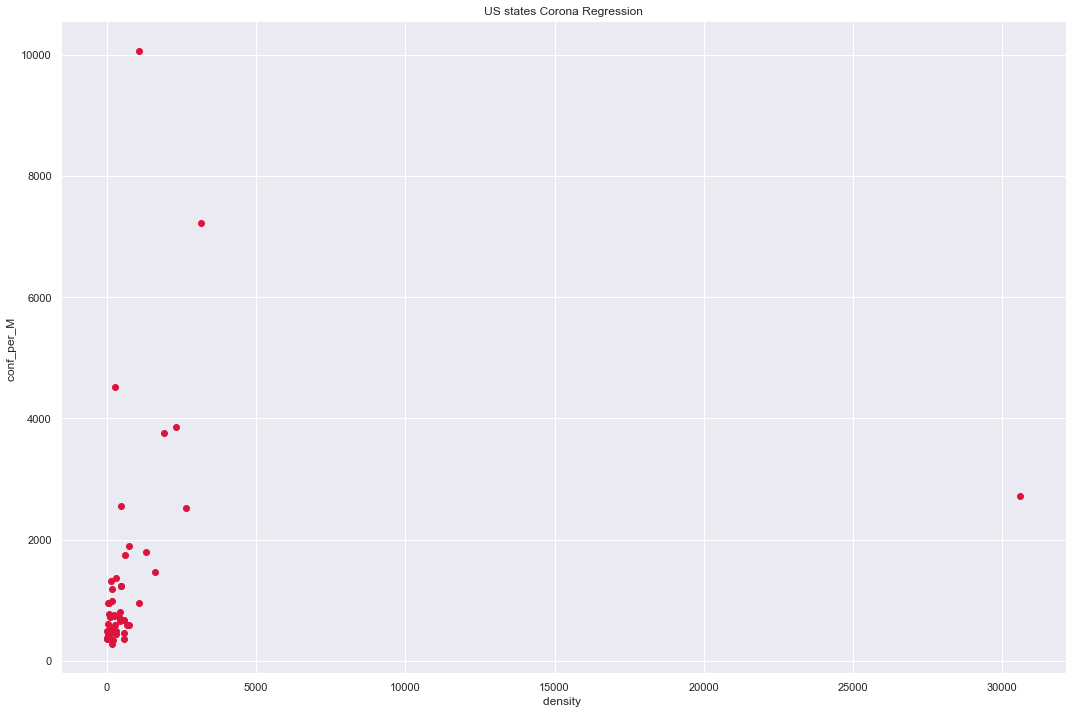

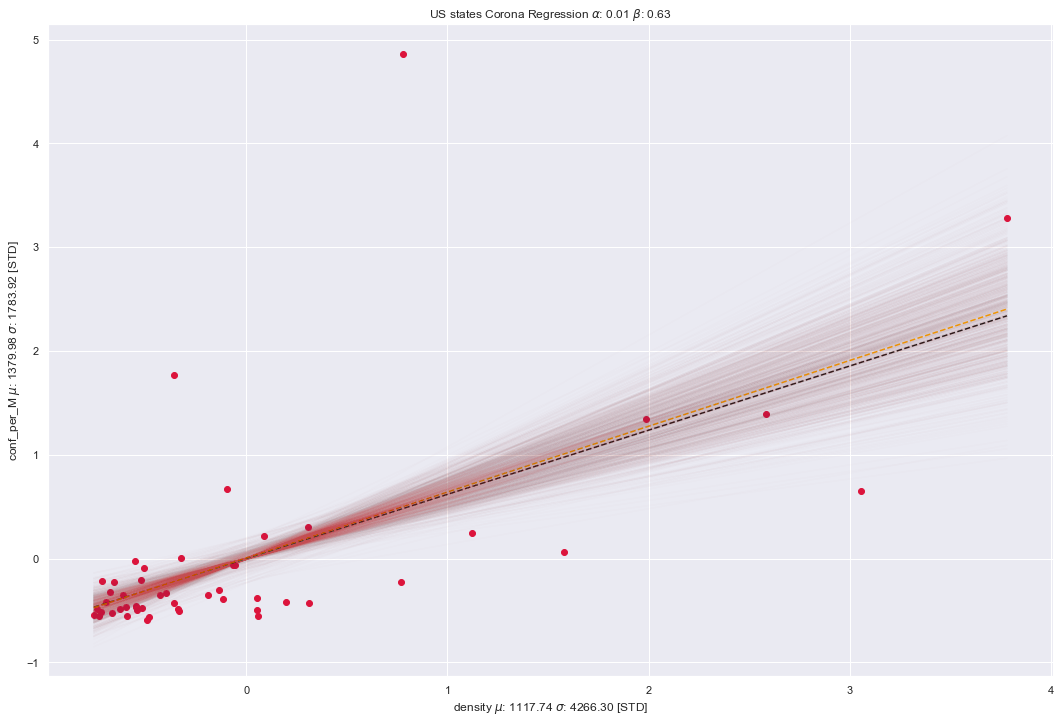

In [8]:
y_param = 'conf_per_M'
x_param = 'density'

x_orig_mean = df[x_param].mean()
x_orig_std = df[x_param].std()
y_orig_mean = df[y_param].mean()
y_orig_std = df[y_param].std()

x = df[x_param]
y = df[y_param]

#### Scatter data ####
plt.figure(figsize=(18,12))
plt.title('US states Corona Regression')
plt.xlabel(x_param + ' ')
plt.ylabel(y_param + ' ')
plt.scatter(x,y,color='crimson')

plt.savefig('US_states_scatter_{}_{}.jpg'.format(x_param,y_param))

#### EXTREME OUTLIERS ####
df = df[df.loc[:,'state'] != 'District of Columbia']
#df = df[df.loc[:,'state'] != 'New York']
####

x = standardize(df[x_param])
y = standardize(df[y_param])
####

slope,intercept,_,_,_ = sps.linregress(x,y)

####

####

result = regression (x,y)
print()
print (result.describe())

X = np.linspace(min(x),max(x),1000)

alpha_samples = np.random.choice(result.alpha_post,replace=True,size=len(X))
beta_samples = np.random.choice(result.beta_post,replace=True,size=len(X))

alpha_mean = alpha_samples.mean()
alpha_std = alpha_samples.std()
beta_mean = beta_samples.mean()
beta_std  = beta_samples.std()

plt.figure(figsize=(18,12))
plt.title(r'US states Corona Regression $\alpha$: {:.2f} $\beta$: {:.2f}'.format(alpha_mean,beta_mean))
plt.xlabel(x_param + r' $\mu$: {:.2f} $\sigma$: {:.2f} [STD]'.format(x_orig_mean,x_orig_std))
plt.ylabel(y_param + r' $\mu$: {:.2f} $\sigma$: {:.2f} [STD]'.format(y_orig_mean,y_orig_std))
plt.scatter(x,y,color='crimson')
plt.plot(X,[X[i] * slope + intercept for i in range(len(X))],color='k',ls='dashed')
plt.plot(X,[X[i] * beta_mean + alpha_mean for i in range(len(X))],color='orange',ls='dashed')

lines = np.array([X[i] * beta_samples + alpha_samples for i in range(len(X))])

_ = plt.plot(X,lines,color='r',alpha=0.01)

plt.savefig('US_states_regression_{}_{}.jpg'.format(x_param,y_param))

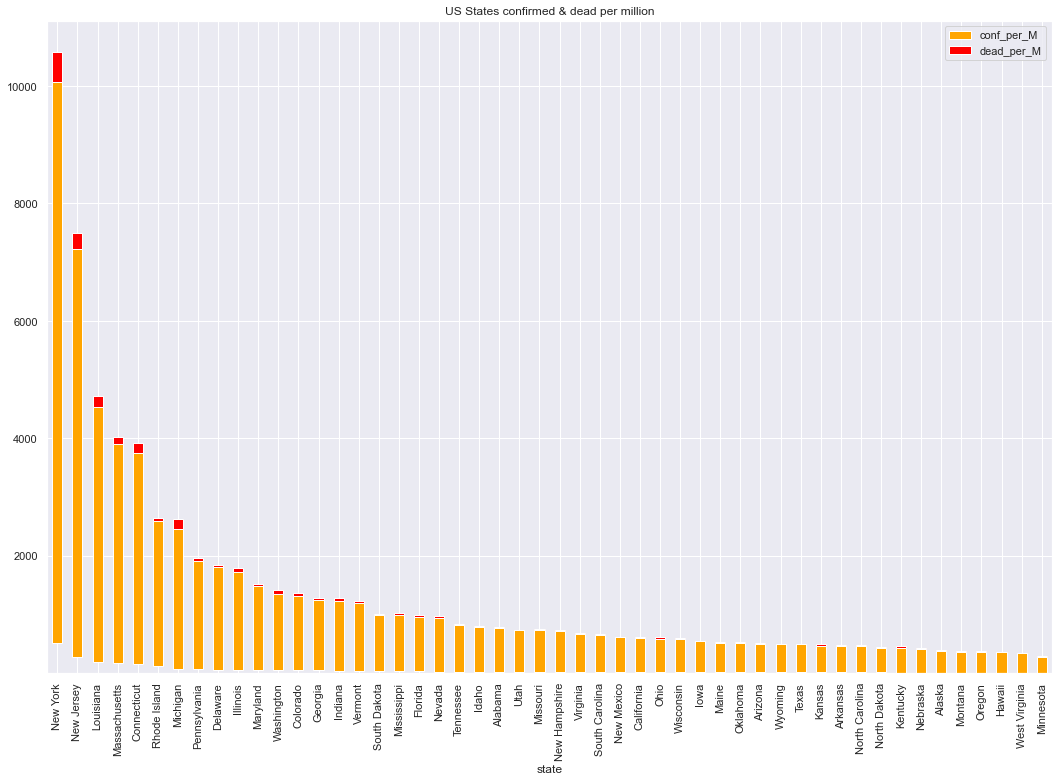

In [9]:
colors = ['orange','red']

temp = df.copy()

temp['conf_per_M'] -= temp['dead_per_M']

bottom = temp['dead_per_M']

temp.sort_values('conf_per_M',ascending=False).plot(
    kind='bar',x='state',y=['conf_per_M','dead_per_M'],figsize=(18,12),color=colors,
title='US States confirmed & dead per million',stacked=True,bottom=bottom)

plt.savefig('US_states_conf_per_M.jpg',format='jpg')